# Extra Credit Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results.csv')

nflx_df = df[df['name'].str.contains('NFLX')]

start_high = df[df['hour']== 9]
end_high = df[df['hour']==15]
start_high = start_high.rename(columns={"high_per_hr": "start_high_per_hr"})
end_high = end_high.rename(columns={"high_per_hr": "end_high_per_hr"})
spread_df = start_high.merge(end_high, left_on='name', right_on='name')
spread_df = spread_df[['name','start_high_per_hr','end_high_per_hr']]

## Looking at Daily Distribution of Highs

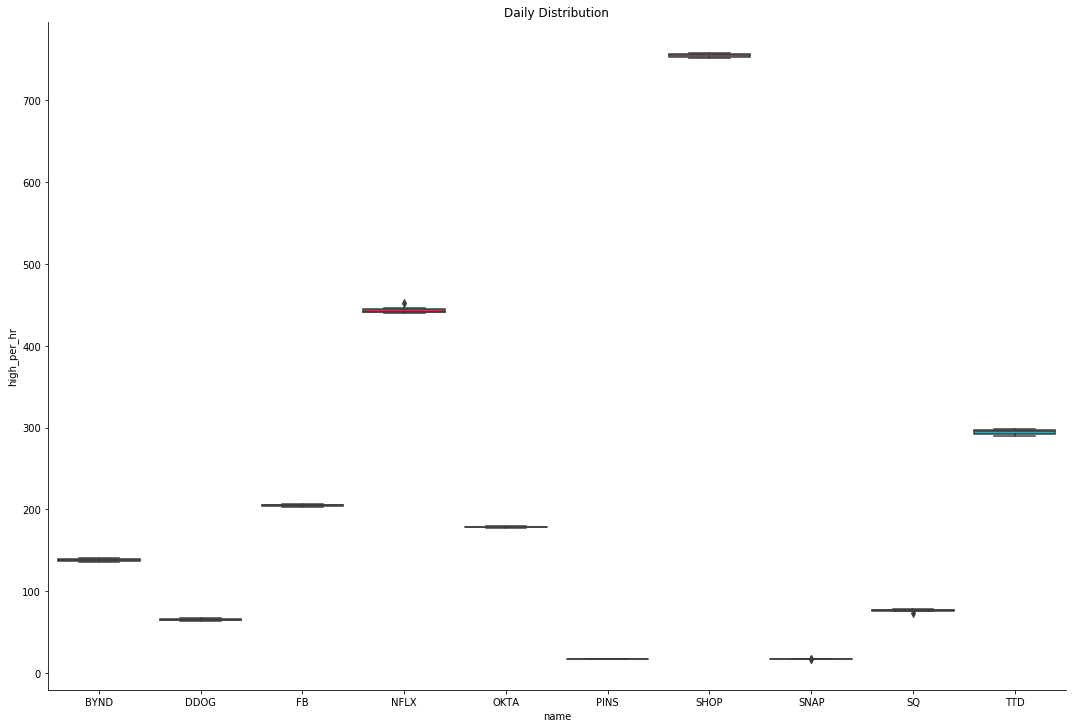

In [3]:
sns.catplot(x="name",y="high_per_hr",data=df,kind="box",height = 10,aspect =1.5 )
plt.title('Daily Distribution')
plt.show()

## Looking at Spread of Starting and Ending Hourly Highs

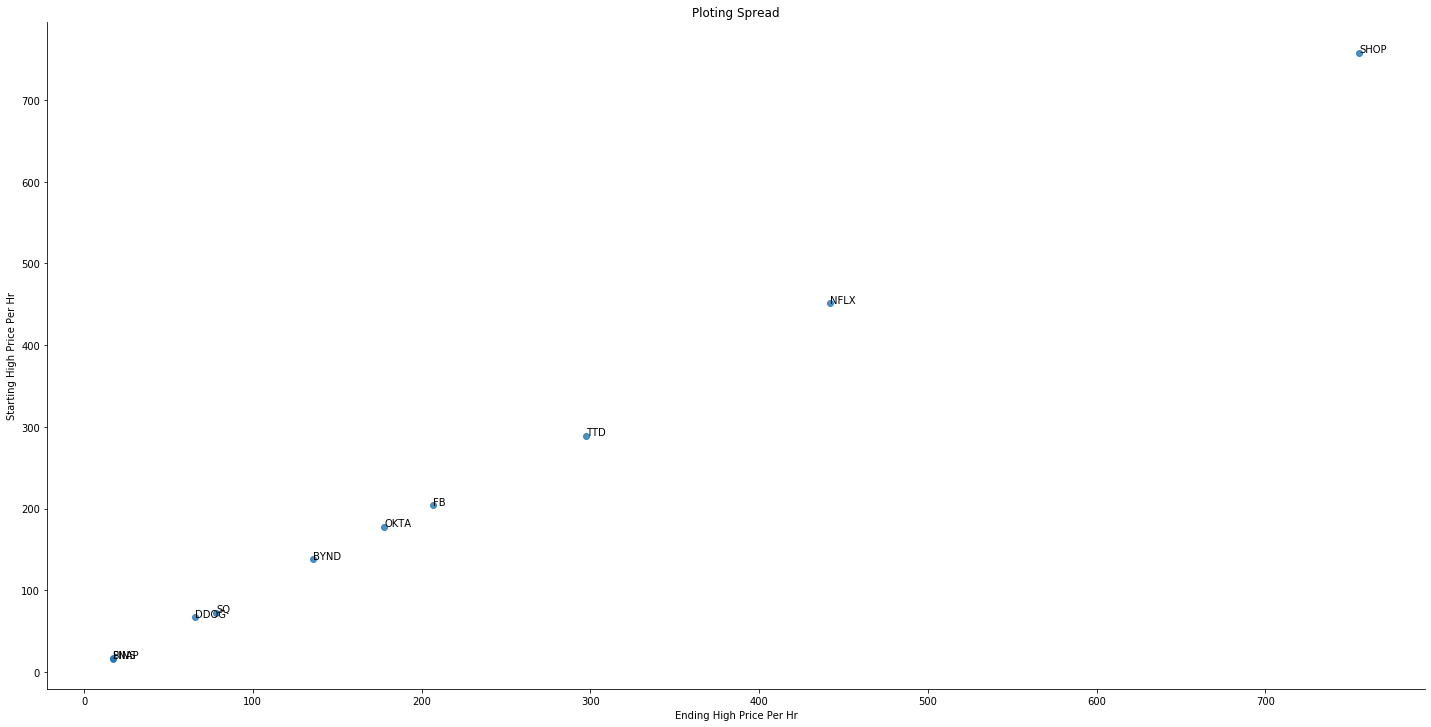

In [4]:
ax = sns.lmplot('end_high_per_hr','start_high_per_hr', data=spread_df, fit_reg=False, height = 10,aspect =2 )
plt.title('Ploting Spread')
plt.xlabel('Ending High Price Per Hr')
plt.ylabel('Starting High Price Per Hr')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(spread_df.end_high_per_hr, spread_df.start_high_per_hr, spread_df.name, plt.gca())

## Looking at Relplots for Changes by Hours

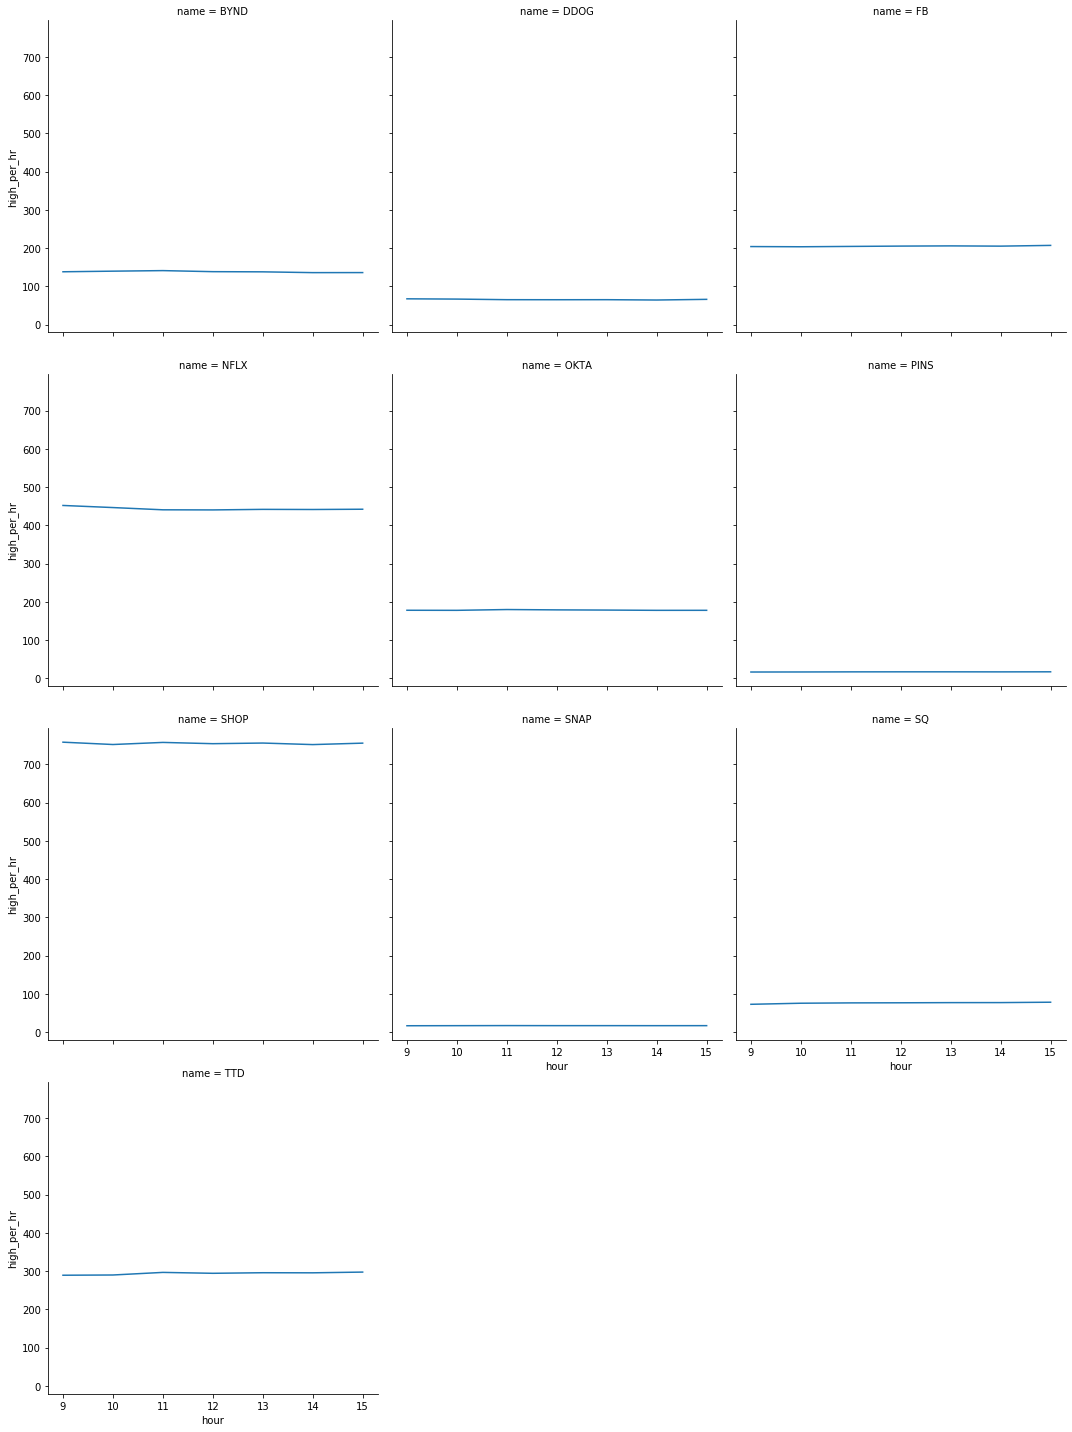

In [5]:
sns.relplot(x="hour", y="high_per_hr", data=df, kind="line", col="name", col_wrap=3)
plt.show()

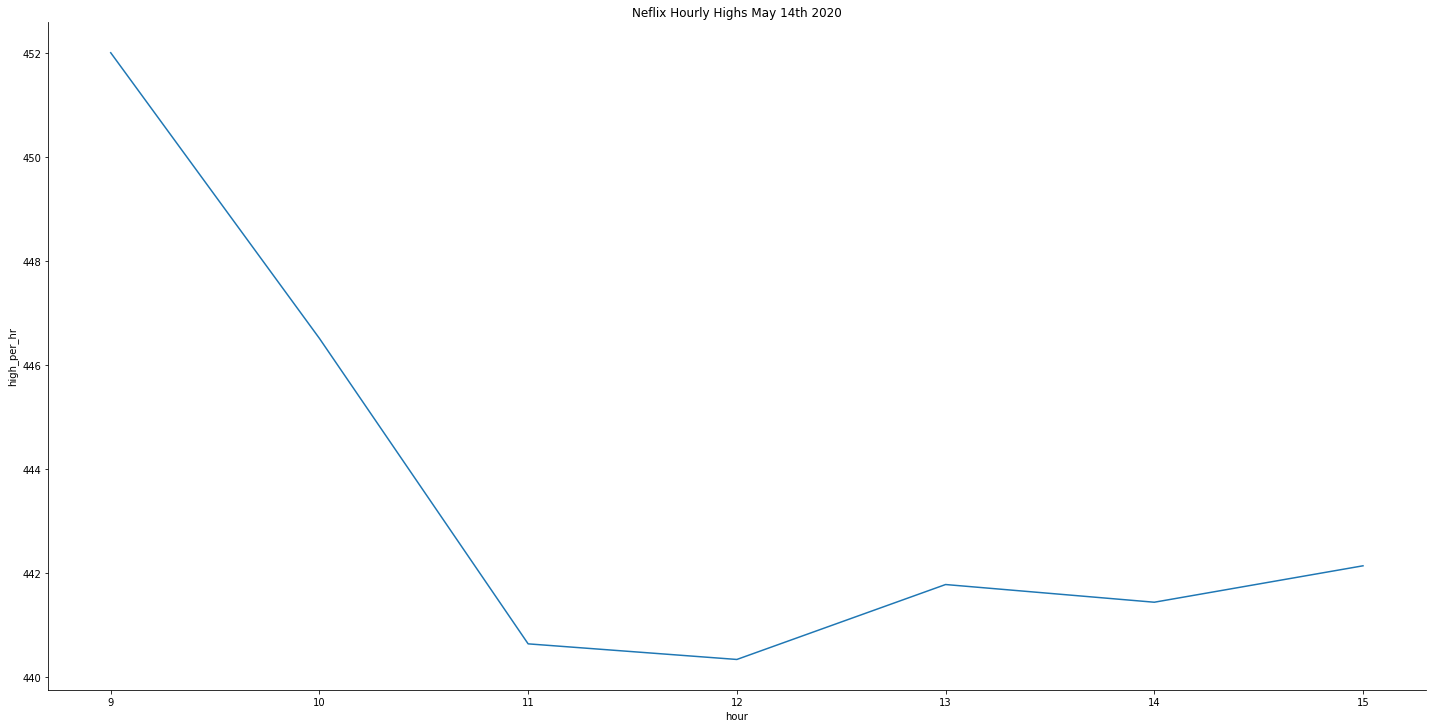

In [6]:
sns.relplot(x="hour", y="high_per_hr", kind = "line", data=nflx_df, height = 10, aspect = 2)
plt.title('Neflix Hourly Highs May 14th 2020')
plt.show()